In [63]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

MAX_POLY = 100
PARTITION_COUNT = 20
PARTITION_SIZE = 400

(80, 1) (80,) (20, 400, 1) (20, 400)


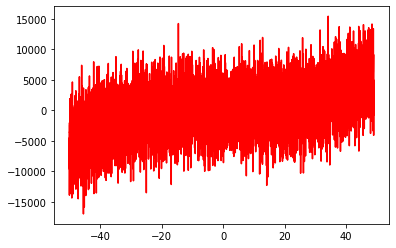

In [64]:
with open("Fx_test.pkl", "rb") as f, open("X_Test.pkl", "rb") as g:
    y_test = pickle.load(f)
    x_test = pickle.load(g)

with open("X_Train.pkl", "rb") as f, open("Y_train.pkl", "rb") as g:
    XTrain = pickle.load(f)
    y_train = pickle.load(g)

x_test = x_test.reshape((x_test.shape[0], 1))
x_train = XTrain.reshape(20, 400, 1)

# print(x_train.reshape(8000))

u = []
v = []
for k in sorted(zip(list(x_train.reshape(8000)), list(y_train.reshape(8000)))):
    u.append(k[0])
    v.append(k[1])

plt.plot(u, v, color="red")

print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

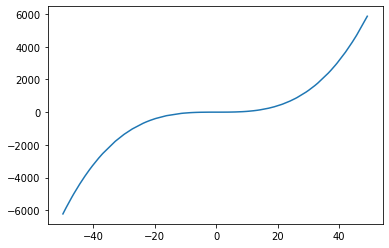

In [65]:
g = np.ndarray(shape=(80, 2))
g[:, 0] = x_test.reshape(80)
g[:, 1] = y_test.reshape(80)
g.sort(axis=0)
plt.plot(g[:, 0], g[:, 1])

In [66]:
train = np.ndarray(shape=(XTrain.shape[0], XTrain.shape[1], 2))
train[:, :, 0] = XTrain
train[:, :, 1] = y_train

test_set = np.ndarray(shape=(x_test.shape[0], 2))
test_set[:, 0] = x_test.reshape(80,)
test_set[:, 1] = y_test

test_set.sort(axis=0)

In [67]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY, 2))

for degree in range(1, MAX_POLY + 1):

    polyfeat = PolynomialFeatures(degree)
    test_poly_xs = polyfeat.fit_transform(test_xs)
    predicted = np.zeros(shape=(80, PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):

        train_xs = x_train[set_idx]
        train_ys = y_train[set_idx]

        polyfeat = PolynomialFeatures(degree)
        poly = polyfeat.fit_transform(train_xs)
        model = linear_model.LinearRegression()
        model.fit(poly, train_ys)
        predicted[:, set_idx] = model.predict(test_poly_xs)

    expected_val = np.sum(predicted, axis=1) / PARTITION_COUNT

    degree_vs_bias[degree - 1, 0] = (
        np.sum((expected_val - test_ys) ** 2) / test_ys.shape
    )

    variance = (
        np.sum(
            (
                predicted
                - np.repeat(expected_val.reshape(80, 1), PARTITION_COUNT, axis=1)
            )
            ** 2,
            axis=1,
        )
        / PARTITION_COUNT
    )
    variance = np.sum(variance) / test_ys.shape

    print(
        "degree {} bias = {} variance = {}".format(
            degree, degree_vs_bias[degree - 1][0], variance
        )
    )
    degree_vs_bias[degree - 1, 1] = variance

degree 1 bias = 999228.3968719237 variance = [70545.48914575]
degree 2 bias = 954619.273794425 variance = [125870.85554877]
degree 3 bias = 9389.7301167912 variance = [150073.73954648]
degree 4 bias = 10907.348134071313 variance = [212235.70832526]
degree 5 bias = 9339.194291326019 variance = [276388.48025474]
degree 6 bias = 10248.585941147874 variance = [316863.49843749]
degree 7 bias = 10335.275861649096 variance = [357510.98475735]
degree 8 bias = 10149.419243937276 variance = [404286.67068579]
degree 9 bias = 10815.487036574244 variance = [459132.37837249]
degree 10 bias = 13628.958257219443 variance = [451749.78675276]
degree 11 bias = 12054.932103703266 variance = [511281.54530611]
degree 12 bias = 28655.860105552438 variance = [486993.65575871]
degree 13 bias = 15601.533086505486 variance = [529402.02013298]
degree 14 bias = 40999.19412078209 variance = [493715.23018995]
degree 15 bias = 66020.67567554217 variance = [519085.8947729]
degree 16 bias = 76673.52053745717 variance =

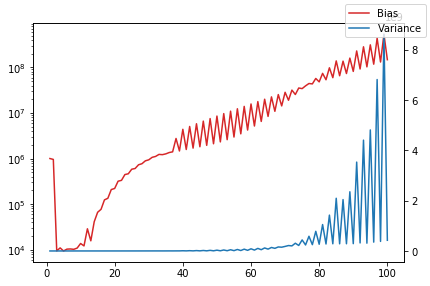

In [71]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:,0], color=color, label='Bias')
plt.yscale('log')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:,1], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()